First 5 rows of the dataset:
  Listing_Date Property_Type       City        State              Status  \
0   2025-04-13     Apartment      Delhi        Delhi  Under Construction   
1   2024-10-07     Apartment  Bangalore    Karnataka  Under Construction   
2   2025-04-08     Apartment    Kolkata  West Bengal            For Sale   
3   2024-09-07     Penthouse     Jaipur    Rajasthan            For Sale   
4   2025-08-02        Studio     Jaipur    Rajasthan            For Sale   

   Price (INR)  Area (sqft)  
0     20456905         2506  
1     38598928         1212  
2      8287781         2291  
3     39664518         2128  
4     32145908         2778  

Categorical Columns: ['Property_Type', 'City', 'State', 'Status']
Continuous Columns: ['Price (INR)', 'Area (sqft)']


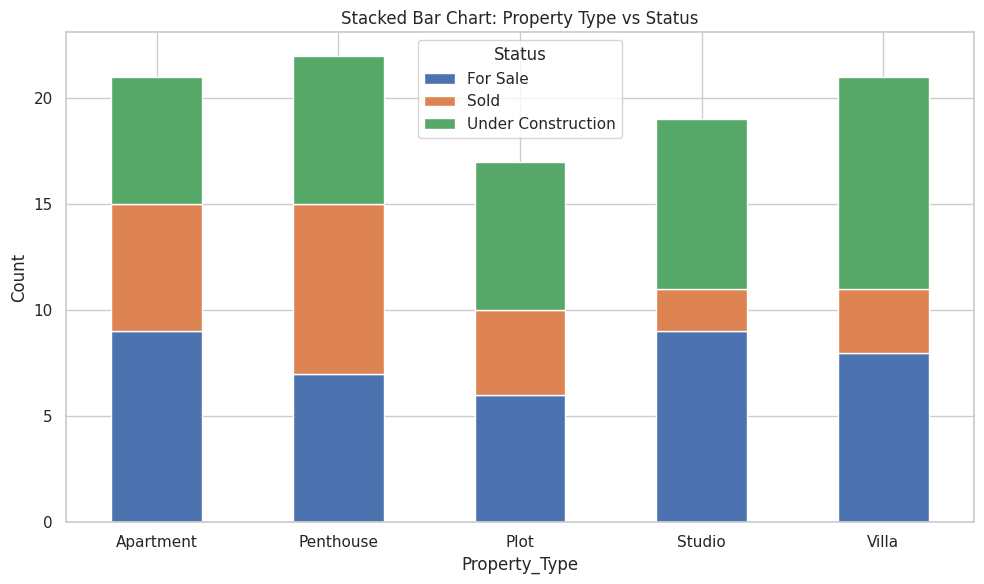

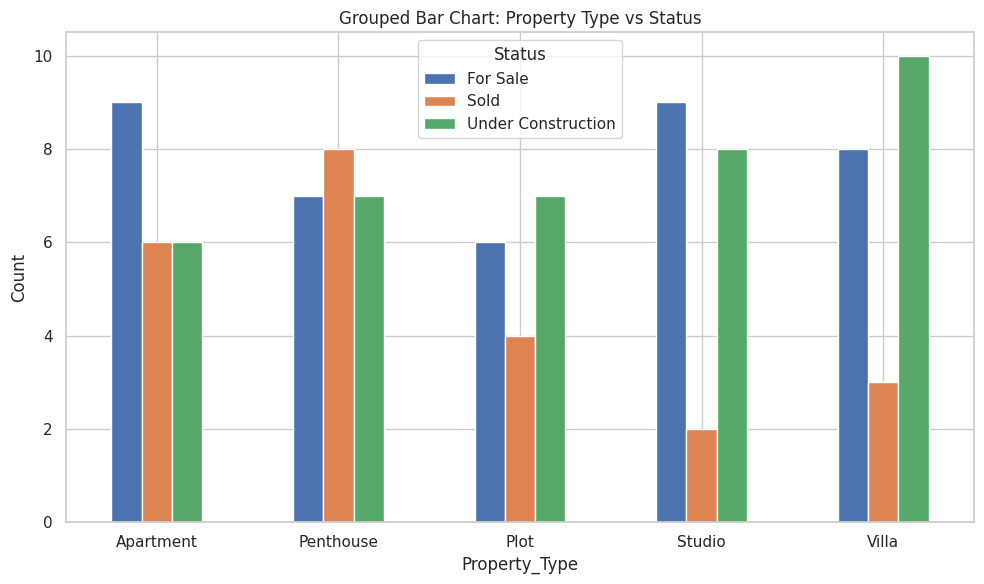

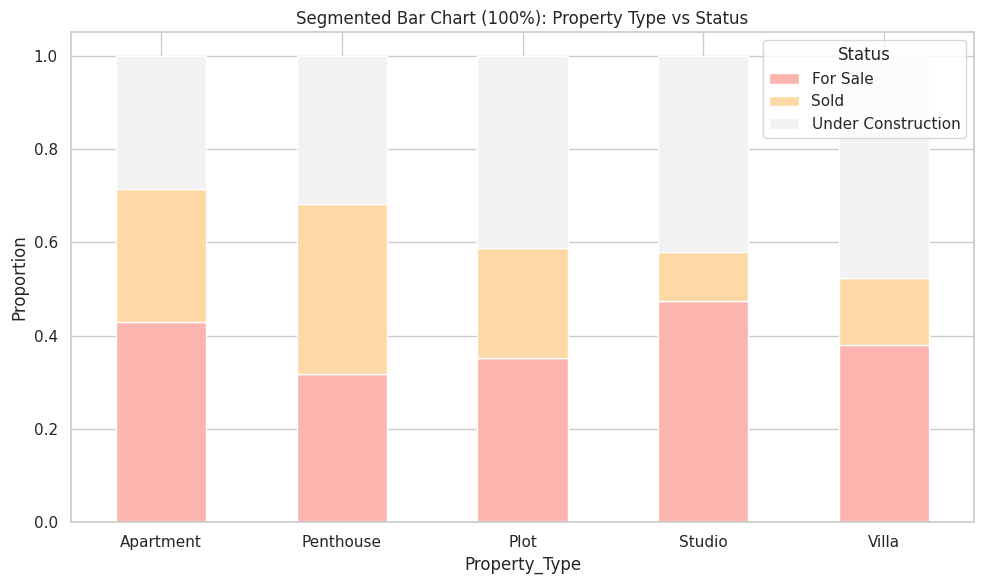

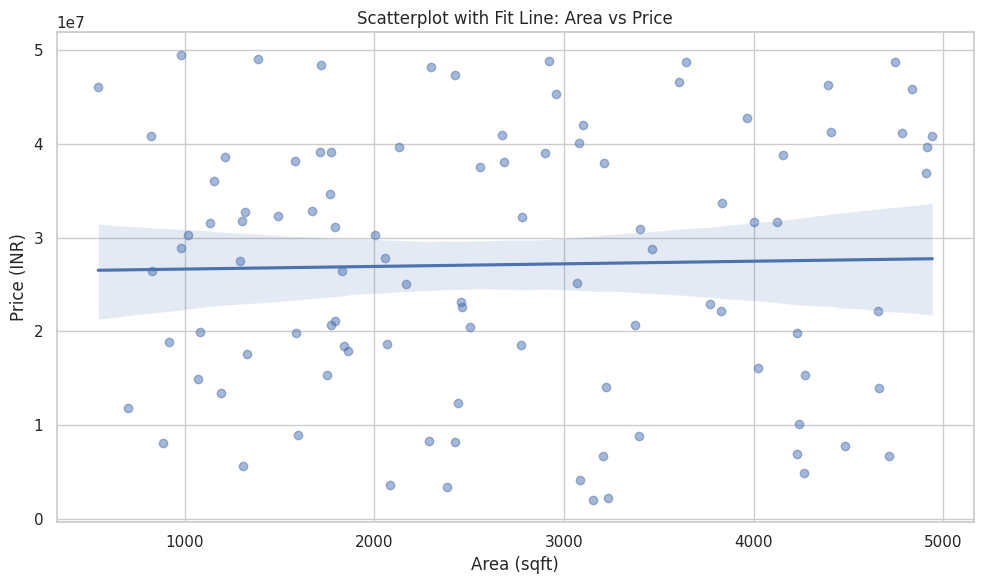

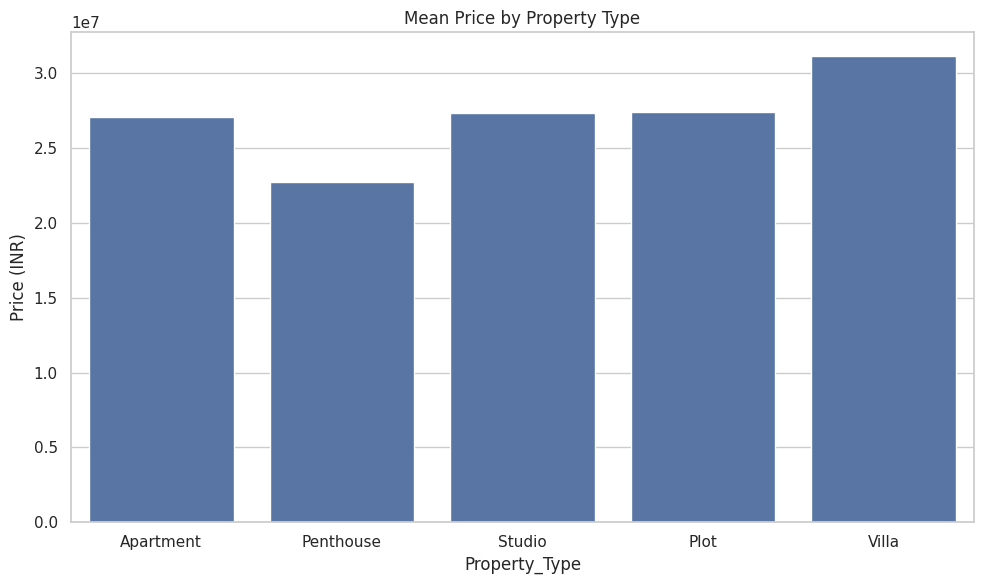

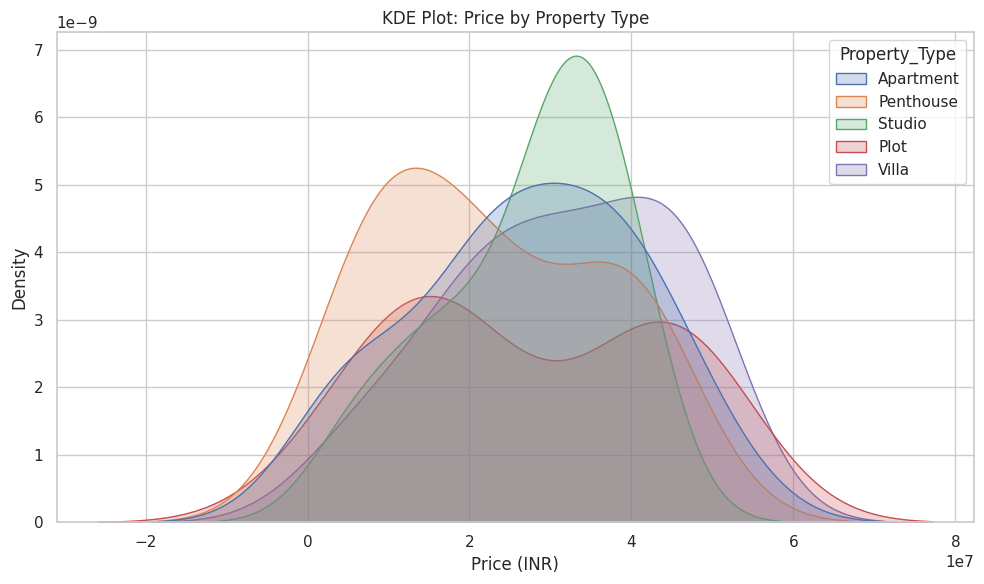

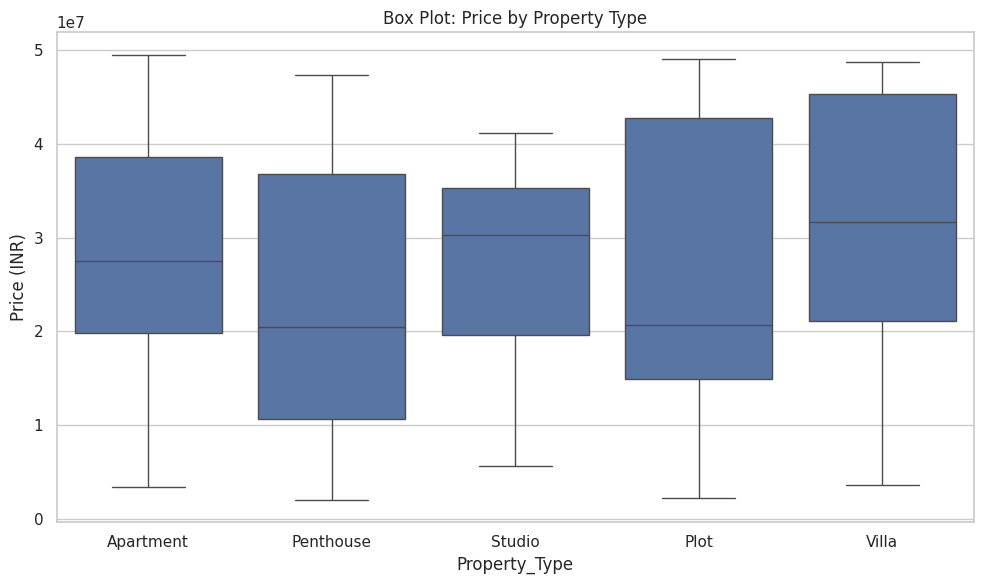

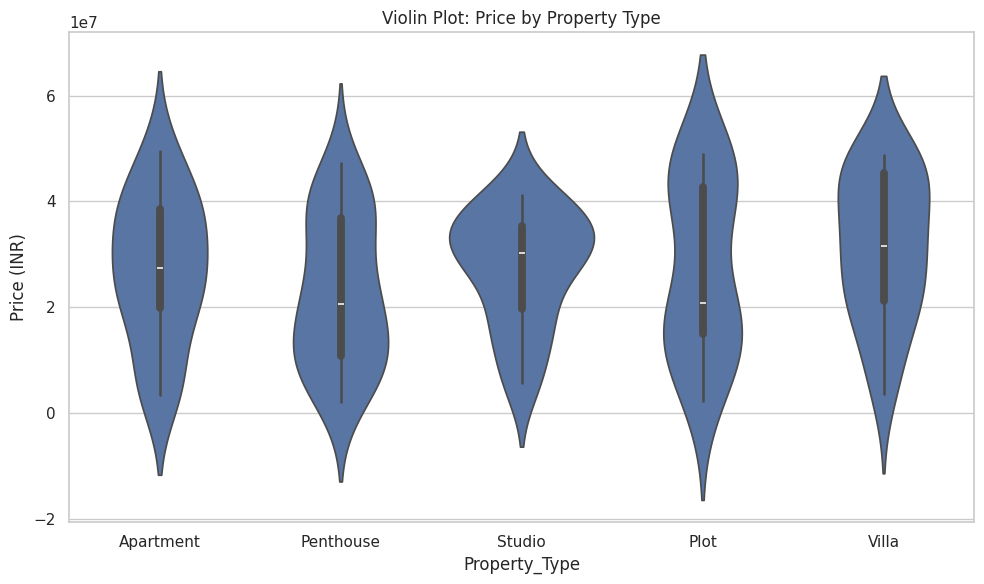

<Figure size 1000x600 with 0 Axes>

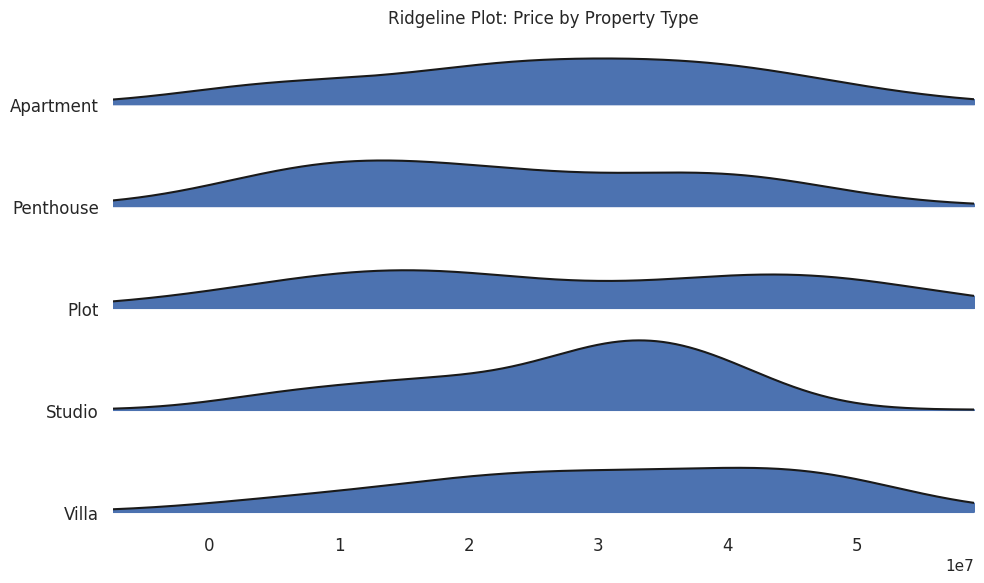

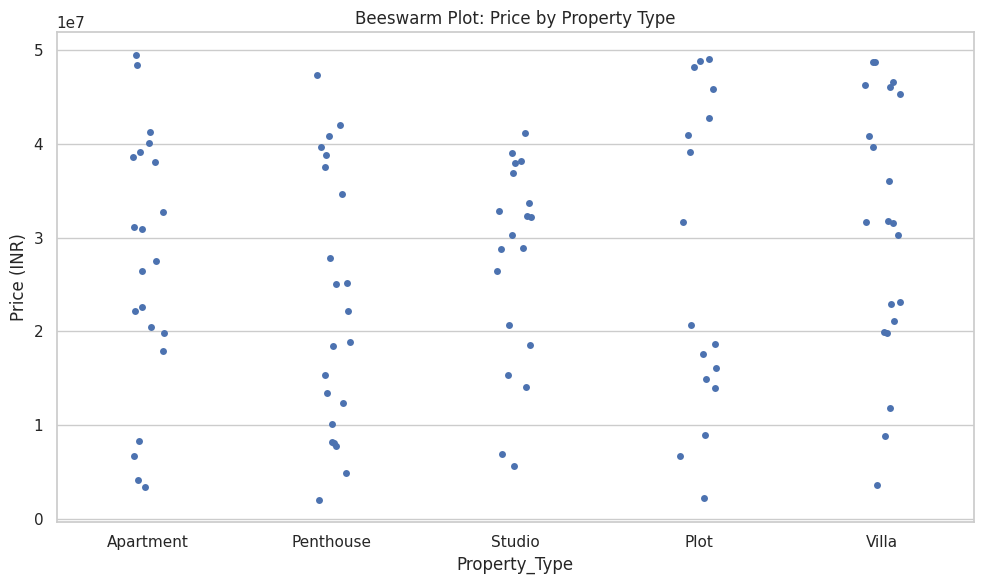

In [ ]:
# Install required library
!pip install -q joypy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

# Use Colab whitegrid theme
sns.set(style="whitegrid")

# Load the uploaded CSV file directly
df = pd.read_csv("/content/real_estate_listings_100.csv")  # Adjust if needed

# Preview
print("First 5 rows of the dataset:")
print(df.head())

# Convert date
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')

# Define column types
categorical_cols = ['Property_Type', 'City', 'State', 'Status']
continuous_cols = ['Price (INR)', 'Area (sqft)']
print("\nCategorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

# Categorical vs Categorical
cat_counts = df.groupby(['Property_Type', 'Status']).size().unstack().fillna(0)

# Stacked Bar Chart
cat_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart: Property Type vs Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Grouped Bar Chart
cat_counts.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Grouped Bar Chart: Property Type vs Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Segmented Bar Chart (100%)
cat_counts_pct = cat_counts.div(cat_counts.sum(axis=1), axis=0)
cat_counts_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')
plt.title("Segmented Bar Chart (100%): Property Type vs Status")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Continuous vs Continuous
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Area (sqft)', y='Price (INR)', scatter_kws={"alpha":0.5})
plt.title("Scatterplot with Fit Line: Area vs Price")
plt.tight_layout()
plt.show()

# Categorical vs Continuous
# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Property_Type', y='Price (INR)', estimator='mean', errorbar=None)
plt.title("Mean Price by Property Type")
plt.tight_layout()
plt.show()

# KDE Plot
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Price (INR)', hue='Property_Type', fill=True)
plt.title("KDE Plot: Price by Property Type")
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Property_Type', y='Price (INR)')
plt.title("Box Plot: Price by Property Type")
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Property_Type', y='Price (INR)')
plt.title("Violin Plot: Price by Property Type")
plt.tight_layout()
plt.show()

# Ridgeline Plot
plt.figure(figsize=(10,6))
joyplot(df, by='Property_Type', column='Price (INR)', figsize=(10,6), kind='kde')
plt.title("Ridgeline Plot: Price by Property Type")
plt.tight_layout()
plt.show()

# Beeswarm Plot
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Property_Type', y='Price (INR)', jitter=True)
plt.title("Beeswarm Plot: Price by Property Type")
plt.tight_layout()
plt.show()
